# **SQL For Python**

---

*SQLite is probably the most straightforward database to connect to with a Python application since you don't need to install any external Python SQL modules to do so. By default, your Python installation contains a Python SQL library named sqlite3 that you can use to interact with an SQLite database.*


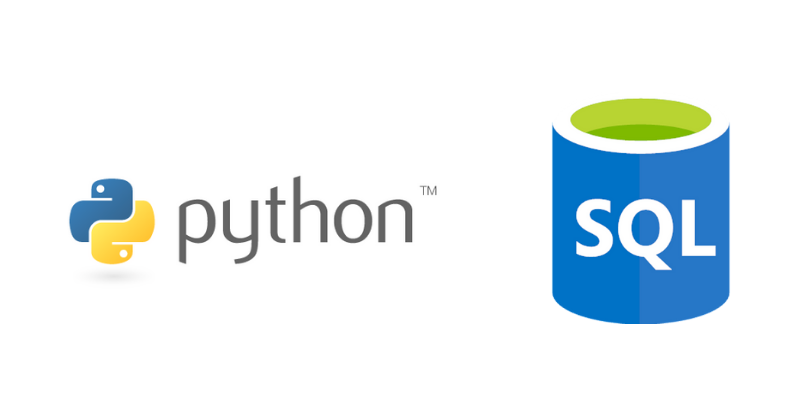

## Libaries

In [176]:
import sqlite3
import pandas as pd
import numpy as np

# Read and Create Database

## Create DB

In [177]:
from sqlite3 import connect
conn = connect('test1.db')
df = pd.DataFrame(data=[[0, '10/11/12'], [1, '12/11/10']],
                  columns=['int_column', 'date_column'])
df.to_sql('test_data', conn)

In [178]:
Cursor = conn.cursor()
TableName ="CREATE TABLE Student(Name VARCHAR(255),Roll_no int);"
 
Cursor.execute(TableName)

In [179]:
sql = "INSERT INTO Student (Name, Roll_no) VALUES (?, ?)"
val = ("Ram", "85")
  
Cursor.execute(sql, val)
conn.commit()
  
print(Cursor.rowcount, "details inserted")

1 details inserted


In [180]:
sql = "INSERT INTO Student (Name, Roll_no) VALUES (?, ?)"
val = [("Akash", "98"),
       ("Neel", "23"),
       ("Rohan", "43"),
       ("Amit", "87"),
       ("Anil", "45"), 
       ("Megha", "55"), 
       ("Sita", "95")]
  
Cursor.executemany(sql, val)
conn.commit()
print(Cursor.rowcount, "details inserted")

7 details inserted


In [181]:
pd.read_sql('SELECT int_column, date_column FROM test_data', conn)

,int_column,date_column
0,0,10/11/12
1,1,12/11/10


In [182]:
data = pd.read_sql('SELECT int_column, date_column FROM test_data',
            conn,
            parse_dates=["date_column"])

In [183]:
data

,int_column,date_column
0,0,2012-10-11
1,1,2010-12-11


In [184]:
students = pd.read_sql('SELECT * FROM Student',
            conn)

In [185]:
students

,Name,Roll_no
0,Ram,85
1,Akash,98
2,Neel,23
3,Rohan,43
4,Amit,87
5,Anil,45
6,Megha,55
7,Sita,95


## Create DB from SQL

First we connect to sqlite3 server.Upload sql file.

In [186]:
connection = sqlite3.connect(":memory:")

cursor = connection.cursor()

sql_file = open("sample.sql")
sql_as_string = sql_file.read()
cursor.executescript(sql_as_string)

for row in cursor.execute("SELECT * FROM airports"):
    print(row)

('ORD', 'Chicago', 'United States')
('JFK', 'New York City', 'United States')
('CDG', 'Paris', 'France')
('LHR', 'London', 'United Kingdom')
('DME', 'Moscow', 'Russia')
('SVO', 'Moscow', 'Russia')


We can see table names.

In [187]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
myresult = cursor.fetchall()
 
for x in myresult:
    print(x)

('airports',)


We can write sql code language in front of pandas.Than we can read Dataframe type.

## Read DB

In [188]:
conn = connect('/content/sample.db')
cursor = conn.cursor()

In [189]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
myresult = cursor.fetchall()
 
for x in myresult:
    print(x)

('students',)


In [190]:
data = pd.read_sql_query("SELECT * FROM students",
            conn)

In [191]:
data

,ID,First,Middle,Last,Age,Class,Father,Number
0,1,Ali,Ahmed,Siddiqui,7,3,Ahmed Siddiqui,123456789
1,2,Ali,Murtaza,Shahid,12,8,Shahid Abbas,123789456
2,3,Ahmed,Qasim,Shah,13,8,Muhammad Shah,1235465879
3,4,Syed,Jaffar,Hussain,7,6,Syed Mehmood Hussain,12567
4,5,Abbas,Haider,Rizvi,9,5,Ubaid Rizvi,456789123
5,6,Muhammad,Asif,,6,2,Muhammad Ali,1010112
6,7,Kashif,Ali,Abbasi,11,9,Mehmood Ali Abbasi,5554446
7,8,Jaffar,Raza,Kazmi,8,8,Hamid Raza,223344
8,9,Mohammad,Salman,Mehmood,15,10,Mehmood Kazmi,6654231
9,10,Mohammad,Shoaib,Ahmed,13,9,hakir,456789


# SQL Analysis

Data source : https://www.w3resource.com/sql/sql-table.php

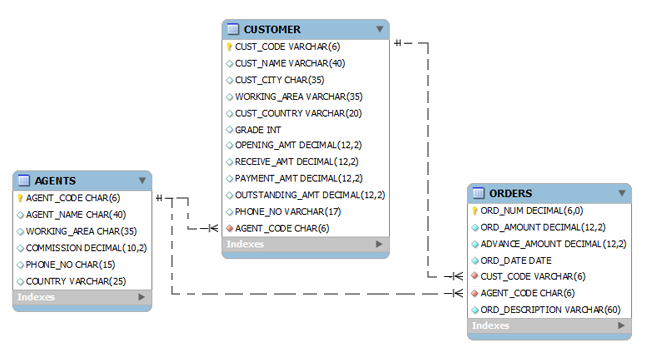

In [192]:
connection = sqlite3.connect(":memory:")

cursor = connection.cursor()

sql_file = open("/content/example.sql")
sql_as_string = sql_file.read()
cursor.executescript(sql_as_string)

In [193]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
myresult = cursor.fetchall()
 
for x in myresult:
    print(x)

('AGENTS',)
('CUSTOMER',)
('ORDERS',)


In [194]:
agents = pd.read_sql('SELECT * FROM AGENTS',
            connection)

In [195]:
agents

,AGENT_CODE,AGENT_NAME,WORKING_AREA,COMMISSION,PHONE_NO,COUNTRY
0,A007,Ramasundar,Bangalore,0.15,077-25814763,
1,A003,Alex,London,0.13,075-12458969,
2,A008,Alford,New York,0.12,044-25874365,
3,A011,Ravi Kumar,Bangalore,0.15,077-45625874,
4,A010,Santakumar,Chennai,0.14,007-22388644,
5,A012,Lucida,San Jose,0.12,044-52981425,
6,A005,Anderson,Brisban,0.13,045-21447739,
7,A001,Subbarao,Bangalore,0.14,077-12346674,
8,A002,Mukesh,Mumbai,0.11,029-12358964,
9,A006,McDen,London,0.15,078-22255588,


In [196]:
customer = pd.read_sql('SELECT * FROM CUSTOMER -- This code select all costumer',
            connection)

In [197]:
customer

,CUST_CODE,CUST_NAME,CUST_CITY,WORKING_AREA,CUST_COUNTRY,GRADE,OPENING_AMT,RECEIVE_AMT,PAYMENT_AMT,OUTSTANDING_AMT,PHONE_NO,AGENT_CODE
0,C00013,Holmes,London,London,UK,2,6000,5000,7000,4000,BBBBBBB,A003
1,C00001,Micheal,New York,New York,USA,2,3000,5000,2000,6000,CCCCCCC,A008
2,C00020,Albert,New York,New York,USA,3,5000,7000,6000,6000,BBBBSBB,A008
3,C00025,Ravindran,Bangalore,Bangalore,India,2,5000,7000,4000,8000,AVAVAVA,A011
4,C00024,Cook,London,London,UK,2,4000,9000,7000,6000,FSDDSDF,A006
5,C00015,Stuart,London,London,UK,1,6000,8000,3000,11000,GFSGERS,A003
6,C00002,Bolt,New York,New York,USA,3,5000,7000,9000,3000,DDNRDRH,A008
7,C00018,Fleming,Brisban,Brisban,Australia,2,7000,7000,9000,5000,NHBGVFC,A005
8,C00021,Jacks,Brisban,Brisban,Australia,1,7000,7000,7000,7000,WERTGDF,A005
9,C00019,Yearannaidu,Chennai,Chennai,India,1,8000,7000,7000,8000,ZZZZBFV,A010


In [198]:
orders = pd.read_sql('SELECT * FROM ORDERS',
            connection)

In [199]:
orders

,ORD_NUM,ORD_AMOUNT,ADVANCE_AMOUNT,ORD_DATE,CUST_CODE,AGENT_CODE,ORD_DESCRIPTION
0,200100,1000,600,08/01/2008,C00013,A003,SOD
1,200110,3000,500,04/15/2008,C00019,A010,SOD
2,200107,4500,900,08/30/2008,C00007,A010,SOD
3,200112,2000,400,05/30/2008,C00016,A007,SOD
4,200113,4000,600,06/10/2008,C00022,A002,SOD
5,200102,2000,300,05/25/2008,C00012,A012,SOD
6,200114,3500,2000,08/15/2008,C00002,A008,SOD
7,200122,2500,400,09/16/2008,C00003,A004,SOD
8,200118,500,100,07/20/2008,C00023,A006,SOD
9,200119,4000,700,09/16/2008,C00007,A010,SOD


## **Order By**

The ORDER BY keyword is used to sort the result-set in ascending or descending order.

The ORDER BY keyword sorts the records in ascending order by default. To sort the records in descending order, use the DESC keyword.

In [200]:
order_customer = pd.read_sql('SELECT * FROM CUSTOMER ORDER BY OUTSTANDING_AMT DESC',
            connection)

In [201]:
order_customer

,CUST_CODE,CUST_NAME,CUST_CITY,WORKING_AREA,CUST_COUNTRY,GRADE,OPENING_AMT,RECEIVE_AMT,PAYMENT_AMT,OUTSTANDING_AMT,PHONE_NO,AGENT_CODE
0,C00009,Ramesh,Mumbai,Mumbai,India,3,8000,7000,3000,12000,Phone No,A002
1,C00014,Rangarappa,Bangalore,Bangalore,India,2,8000,11000,7000,12000,AAAATGF,A001
2,C00016,Venkatpati,Bangalore,Bangalore,India,2,8000,11000,7000,12000,JRTVFDD,A007
3,C00015,Stuart,London,London,UK,1,6000,8000,3000,11000,GFSGERS,A003
4,C00005,Sasikant,Mumbai,Mumbai,India,1,7000,11000,7000,11000,147-25896312,A002
5,C00006,Shilton,Torento,Torento,Canada,1,10000,7000,6000,11000,DDDDDDD,A004
6,C00011,Sundariya,Chennai,Chennai,India,3,7000,11000,7000,11000,PPHGRTS,A010
7,C00007,Ramanathan,Chennai,Chennai,India,1,7000,11000,9000,9000,GHRDWSD,A010
8,C00022,Avinash,Mumbai,Mumbai,India,2,7000,11000,9000,9000,113-12345678,A002
9,C00017,Srinivas,Bangalore,Bangalore,India,2,8000,4000,3000,9000,AAAAAAB,A007


## **Select Distinc**

The SELECT DISTINCT statement is used to return only distinct (different) values.

Inside a table, a column often contains many duplicate values; and sometimes you only want to list the different (distinct) values.

In [202]:
select_distinct_customer = pd.read_sql('SELECT WORKING_AREA FROM CUSTOMER',
            connection)
select_distinct_customer

,WORKING_AREA
0,London
1,New York
2,New York
3,Bangalore
4,London
5,London
6,New York
7,Brisban
8,Brisban
9,Chennai


## **Where**

The WHERE clause is used to filter records.

It is used to extract only those records that fulfill a specified condition.

In [203]:
where_customer = pd.read_sql("SELECT * FROM CUSTOMER WHERE WORKING_AREA='New York'",
            connection)
where_customer

,CUST_CODE,CUST_NAME,CUST_CITY,WORKING_AREA,CUST_COUNTRY,GRADE,OPENING_AMT,RECEIVE_AMT,PAYMENT_AMT,OUTSTANDING_AMT,PHONE_NO,AGENT_CODE
0,C00001,Micheal,New York,New York,USA,2,3000,5000,2000,6000,CCCCCCC,A008
1,C00020,Albert,New York,New York,USA,3,5000,7000,6000,6000,BBBBSBB,A008
2,C00002,Bolt,New York,New York,USA,3,5000,7000,9000,3000,DDNRDRH,A008


## **And,Or and Not**

The WHERE clause can be combined with AND, OR, and NOT operators.

The AND and OR operators are used to filter records based on more than one condition:

The AND operator displays a record if all the conditions separated by AND are TRUE.
The OR operator displays a record if any of the conditions separated by OR is TRUE.
The NOT operator displays a record if the condition(s) is NOT TRUE.

In [204]:
and_customer = pd.read_sql("SELECT * FROM CUSTOMER WHERE WORKING_AREA='New York' and GRADE=2",
            connection)
and_customer

,CUST_CODE,CUST_NAME,CUST_CITY,WORKING_AREA,CUST_COUNTRY,GRADE,OPENING_AMT,RECEIVE_AMT,PAYMENT_AMT,OUTSTANDING_AMT,PHONE_NO,AGENT_CODE
0,C00001,Micheal,New York,New York,USA,2,3000,5000,2000,6000,CCCCCCC,A008


In [205]:
or_customer = pd.read_sql("SELECT * FROM CUSTOMER WHERE WORKING_AREA='New York' or WORKING_AREA='London'",
            connection)
or_customer

,CUST_CODE,CUST_NAME,CUST_CITY,WORKING_AREA,CUST_COUNTRY,GRADE,OPENING_AMT,RECEIVE_AMT,PAYMENT_AMT,OUTSTANDING_AMT,PHONE_NO,AGENT_CODE
0,C00013,Holmes,London,London,UK,2,6000,5000,7000,4000,BBBBBBB,A003
1,C00001,Micheal,New York,New York,USA,2,3000,5000,2000,6000,CCCCCCC,A008
2,C00020,Albert,New York,New York,USA,3,5000,7000,6000,6000,BBBBSBB,A008
3,C00024,Cook,London,London,UK,2,4000,9000,7000,6000,FSDDSDF,A006
4,C00015,Stuart,London,London,UK,1,6000,8000,3000,11000,GFSGERS,A003
5,C00002,Bolt,New York,New York,USA,3,5000,7000,9000,3000,DDNRDRH,A008
6,C00023,Karl,London,London,UK,0,4000,6000,7000,3000,AAAABAA,A006


In [206]:
not_customer = pd.read_sql("SELECT * FROM CUSTOMER WHERE NOT WORKING_AREA='New York'",
             connection)
not_customer

,CUST_CODE,CUST_NAME,CUST_CITY,WORKING_AREA,CUST_COUNTRY,GRADE,OPENING_AMT,RECEIVE_AMT,PAYMENT_AMT,OUTSTANDING_AMT,PHONE_NO,AGENT_CODE
0,C00013,Holmes,London,London,UK,2,6000,5000,7000,4000,BBBBBBB,A003
1,C00025,Ravindran,Bangalore,Bangalore,India,2,5000,7000,4000,8000,AVAVAVA,A011
2,C00024,Cook,London,London,UK,2,4000,9000,7000,6000,FSDDSDF,A006
3,C00015,Stuart,London,London,UK,1,6000,8000,3000,11000,GFSGERS,A003
4,C00018,Fleming,Brisban,Brisban,Australia,2,7000,7000,9000,5000,NHBGVFC,A005
5,C00021,Jacks,Brisban,Brisban,Australia,1,7000,7000,7000,7000,WERTGDF,A005
6,C00019,Yearannaidu,Chennai,Chennai,India,1,8000,7000,7000,8000,ZZZZBFV,A010
7,C00005,Sasikant,Mumbai,Mumbai,India,1,7000,11000,7000,11000,147-25896312,A002
8,C00007,Ramanathan,Chennai,Chennai,India,1,7000,11000,9000,9000,GHRDWSD,A010
9,C00022,Avinash,Mumbai,Mumbai,India,2,7000,11000,9000,9000,113-12345678,A002


## **INSERT INTO**

The INSERT INTO statement is used to insert new records in a table.

In [207]:
sql = "INSERT INTO CUSTOMER VALUES ('NEW', 'Mehmet', 'Izmir', 'Izmir', 'Turkey', '1', '12000.00', '22000.00', '12000.00', '22000.00', '123-45678', 'AAAAA');"
  
cursor.execute(sql)
connection.commit()

In [208]:
print(cursor.rowcount, "details inserted")

1 details inserted


In [209]:
customer = pd.read_sql('SELECT * FROM CUSTOMER',
            connection)

In [210]:
customer

,CUST_CODE,CUST_NAME,CUST_CITY,WORKING_AREA,CUST_COUNTRY,GRADE,OPENING_AMT,RECEIVE_AMT,PAYMENT_AMT,OUTSTANDING_AMT,PHONE_NO,AGENT_CODE
0,C00013,Holmes,London,London,UK,2,6000,5000,7000,4000,BBBBBBB,A003
1,C00001,Micheal,New York,New York,USA,2,3000,5000,2000,6000,CCCCCCC,A008
2,C00020,Albert,New York,New York,USA,3,5000,7000,6000,6000,BBBBSBB,A008
3,C00025,Ravindran,Bangalore,Bangalore,India,2,5000,7000,4000,8000,AVAVAVA,A011
4,C00024,Cook,London,London,UK,2,4000,9000,7000,6000,FSDDSDF,A006
5,C00015,Stuart,London,London,UK,1,6000,8000,3000,11000,GFSGERS,A003
6,C00002,Bolt,New York,New York,USA,3,5000,7000,9000,3000,DDNRDRH,A008
7,C00018,Fleming,Brisban,Brisban,Australia,2,7000,7000,9000,5000,NHBGVFC,A005
8,C00021,Jacks,Brisban,Brisban,Australia,1,7000,7000,7000,7000,WERTGDF,A005
9,C00019,Yearannaidu,Chennai,Chennai,India,1,8000,7000,7000,8000,ZZZZBFV,A010


## **NULL Value**

A field with a NULL value is a field with no value.

If a field in a table is optional, it is possible to insert a new record or update a record without adding a value to this field. Then, the field will be saved with a NULL value.

We add NULL Value for this section

In [211]:
agents

,AGENT_CODE,AGENT_NAME,WORKING_AREA,COMMISSION,PHONE_NO,COUNTRY
0,A007,Ramasundar,Bangalore,0.15,077-25814763,
1,A003,Alex,London,0.13,075-12458969,
2,A008,Alford,New York,0.12,044-25874365,
3,A011,Ravi Kumar,Bangalore,0.15,077-45625874,
4,A010,Santakumar,Chennai,0.14,007-22388644,
5,A012,Lucida,San Jose,0.12,044-52981425,
6,A005,Anderson,Brisban,0.13,045-21447739,
7,A001,Subbarao,Bangalore,0.14,077-12346674,
8,A002,Mukesh,Mumbai,0.11,029-12358964,
9,A006,McDen,London,0.15,078-22255588,


In [212]:
sql = "INSERT INTO AGENTS VALUES ('NEW11', NULL, 'Izmir', 0.20, 'Turkey', NULL);"
  
cursor.execute(sql)
connection.commit()

In [213]:
print(cursor.rowcount, "details inserted")

1 details inserted


In [214]:
agents = pd.read_sql('SELECT * FROM AGENTS',
            connection)

In [215]:
agents

,AGENT_CODE,AGENT_NAME,WORKING_AREA,COMMISSION,PHONE_NO,COUNTRY
0,A007,Ramasundar,Bangalore,0.15,077-25814763,
1,A003,Alex,London,0.13,075-12458969,
2,A008,Alford,New York,0.12,044-25874365,
3,A011,Ravi Kumar,Bangalore,0.15,077-45625874,
4,A010,Santakumar,Chennai,0.14,007-22388644,
5,A012,Lucida,San Jose,0.12,044-52981425,
6,A005,Anderson,Brisban,0.13,045-21447739,
7,A001,Subbarao,Bangalore,0.14,077-12346674,
8,A002,Mukesh,Mumbai,0.11,029-12358964,
9,A006,McDen,London,0.15,078-22255588,


We can see **NULL** values.

In [216]:
pd.read_sql('SELECT * FROM AGENTS WHERE AGENT_NAME IS NULL',
            connection)

,AGENT_CODE,AGENT_NAME,WORKING_AREA,COMMISSION,PHONE_NO,COUNTRY
0,NEW11,None,Izmir,0.2,Turkey,None


We can see **NOT NULL** values.

In [217]:
pd.read_sql('SELECT * FROM AGENTS WHERE AGENT_NAME IS NOT NULL',
            connection)

,AGENT_CODE,AGENT_NAME,WORKING_AREA,COMMISSION,PHONE_NO,COUNTRY
0,A007,Ramasundar,Bangalore,0.15,077-25814763,
1,A003,Alex,London,0.13,075-12458969,
2,A008,Alford,New York,0.12,044-25874365,
3,A011,Ravi Kumar,Bangalore,0.15,077-45625874,
4,A010,Santakumar,Chennai,0.14,007-22388644,
5,A012,Lucida,San Jose,0.12,044-52981425,
6,A005,Anderson,Brisban,0.13,045-21447739,
7,A001,Subbarao,Bangalore,0.14,077-12346674,
8,A002,Mukesh,Mumbai,0.11,029-12358964,
9,A006,McDen,London,0.15,078-22255588,


## **UPDATE**

The UPDATE statement is used to modify the existing records in a table.

In [218]:
sql = "UPDATE AGENTS SET AGENT_NAME = 'Seri', WORKING_AREA= 'London' WHERE AGENT_CODE = 'NEW11'"
  
cursor.execute(sql)
connection.commit()

In [219]:
print(cursor.rowcount, "details inserted")

1 details inserted


In [220]:
agents = pd.read_sql('SELECT * FROM AGENTS',
            connection)

In [221]:
agents

,AGENT_CODE,AGENT_NAME,WORKING_AREA,COMMISSION,PHONE_NO,COUNTRY
0,A007,Ramasundar,Bangalore,0.15,077-25814763,
1,A003,Alex,London,0.13,075-12458969,
2,A008,Alford,New York,0.12,044-25874365,
3,A011,Ravi Kumar,Bangalore,0.15,077-45625874,
4,A010,Santakumar,Chennai,0.14,007-22388644,
5,A012,Lucida,San Jose,0.12,044-52981425,
6,A005,Anderson,Brisban,0.13,045-21447739,
7,A001,Subbarao,Bangalore,0.14,077-12346674,
8,A002,Mukesh,Mumbai,0.11,029-12358964,
9,A006,McDen,London,0.15,078-22255588,


We change all **London** cities to **Mexico** cities.

In [222]:
sql = "UPDATE AGENTS SET WORKING_AREA = 'Mexico' WHERE WORKING_AREA = 'London';"
  
cursor.execute(sql)
connection.commit()

In [223]:
print(cursor.rowcount, "details inserted")

3 details inserted


In [224]:
agents = pd.read_sql('SELECT * FROM AGENTS',
            connection)

In [225]:
agents

,AGENT_CODE,AGENT_NAME,WORKING_AREA,COMMISSION,PHONE_NO,COUNTRY
0,A007,Ramasundar,Bangalore,0.15,077-25814763,
1,A003,Alex,Mexico,0.13,075-12458969,
2,A008,Alford,New York,0.12,044-25874365,
3,A011,Ravi Kumar,Bangalore,0.15,077-45625874,
4,A010,Santakumar,Chennai,0.14,007-22388644,
5,A012,Lucida,San Jose,0.12,044-52981425,
6,A005,Anderson,Brisban,0.13,045-21447739,
7,A001,Subbarao,Bangalore,0.14,077-12346674,
8,A002,Mukesh,Mumbai,0.11,029-12358964,
9,A006,McDen,Mexico,0.15,078-22255588,


## **DELETE**

The DELETE statement is used to delete existing records in a table.

We delete the column equal to **AGENT_CODE A007**.

In [226]:
sql = "DELETE FROM AGENTS WHERE AGENT_CODE='A007';"
  
cursor.execute(sql)
connection.commit()

In [227]:
print(cursor.rowcount, "details inserted")

1 details inserted


In [228]:
delete_agents = pd.read_sql('SELECT * FROM AGENTS',
            connection)

In [229]:
delete_agents

,AGENT_CODE,AGENT_NAME,WORKING_AREA,COMMISSION,PHONE_NO,COUNTRY
0,A003,Alex,Mexico,0.13,075-12458969,
1,A008,Alford,New York,0.12,044-25874365,
2,A011,Ravi Kumar,Bangalore,0.15,077-45625874,
3,A010,Santakumar,Chennai,0.14,007-22388644,
4,A012,Lucida,San Jose,0.12,044-52981425,
5,A005,Anderson,Brisban,0.13,045-21447739,
6,A001,Subbarao,Bangalore,0.14,077-12346674,
7,A002,Mukesh,Mumbai,0.11,029-12358964,
8,A006,McDen,Mexico,0.15,078-22255588,
9,A004,Ivan,Torento,0.15,008-22544166,


## **LIMIT**

The SELECT TOP clause is used to specify the number of records to return.

The SELECT TOP clause is useful on large tables with thousands of records. Returning a large number of records can impact performance.

We select **top 3**.

In [230]:
pd.read_sql('SELECT * FROM AGENTS LIMIT 3;',
            connection)

,AGENT_CODE,AGENT_NAME,WORKING_AREA,COMMISSION,PHONE_NO,COUNTRY
0,A003,Alex,Mexico,0.13,075-12458969,
1,A008,Alford,New York,0.12,044-25874365,
2,A011,Ravi Kumar,Bangalore,0.15,077-45625874,


We select the columns equal to **Mexico and Top 2.**

In [231]:
pd.read_sql('SELECT * FROM AGENTS WHERE WORKING_AREA="Mexico" LIMIT 2;',
            connection)

,AGENT_CODE,AGENT_NAME,WORKING_AREA,COMMISSION,PHONE_NO,COUNTRY
0,A003,Alex,Mexico,0.13,075-12458969,
1,A006,McDen,Mexico,0.15,078-22255588,


## **MIN() and MAX()**

The MIN() function returns the smallest value of the selected column.

The MAX() function returns the largest value of the selected column.

In [232]:
pd.read_sql('SELECT MIN(COMMISSION) AS SmallestPrice FROM AGENTS;',
            connection)

,SmallestPrice
0,0.11


In [233]:
pd.read_sql('SELECT MAX(COMMISSION) AS LargestPrice FROM AGENTS;',
            connection)

,LargestPrice
0,0.2


## **COUNT(), AVG() and SUM()**

The COUNT() function returns the number of rows that matches a specified criterion.

The AVG() function returns the average value of a numeric column. 

The SUM() function returns the total sum of a numeric column. 

In [234]:
sql = "SELECT COUNT(AGENT_NAME) \
       FROM AGENTS;"

In [235]:
pd.read_sql(sql,
            connection)

,COUNT(AGENT_NAME)
0,12


In [236]:
sql = "SELECT AVG(COMMISSION) \
       FROM AGENTS;"

In [237]:
pd.read_sql(sql,
            connection)

,AVG(COMMISSION)
0,0.1375


In [238]:
sql = "SELECT SUM(COMMISSION) \
       FROM AGENTS;"

In [239]:
pd.read_sql(sql,
            connection)

,SUM(COMMISSION)
0,1.65


## **LIKE**

The LIKE operator is used in a WHERE clause to search for a specified pattern in a column.

There are two wildcards often used in conjunction with the LIKE operator:

 The percent sign (%) represents zero, one, or multiple characters
 The underscore sign (_) represents one, single character

In [240]:
customer

,CUST_CODE,CUST_NAME,CUST_CITY,WORKING_AREA,CUST_COUNTRY,GRADE,OPENING_AMT,RECEIVE_AMT,PAYMENT_AMT,OUTSTANDING_AMT,PHONE_NO,AGENT_CODE
0,C00013,Holmes,London,London,UK,2,6000,5000,7000,4000,BBBBBBB,A003
1,C00001,Micheal,New York,New York,USA,2,3000,5000,2000,6000,CCCCCCC,A008
2,C00020,Albert,New York,New York,USA,3,5000,7000,6000,6000,BBBBSBB,A008
3,C00025,Ravindran,Bangalore,Bangalore,India,2,5000,7000,4000,8000,AVAVAVA,A011
4,C00024,Cook,London,London,UK,2,4000,9000,7000,6000,FSDDSDF,A006
5,C00015,Stuart,London,London,UK,1,6000,8000,3000,11000,GFSGERS,A003
6,C00002,Bolt,New York,New York,USA,3,5000,7000,9000,3000,DDNRDRH,A008
7,C00018,Fleming,Brisban,Brisban,Australia,2,7000,7000,9000,5000,NHBGVFC,A005
8,C00021,Jacks,Brisban,Brisban,Australia,1,7000,7000,7000,7000,WERTGDF,A005
9,C00019,Yearannaidu,Chennai,Chennai,India,1,8000,7000,7000,8000,ZZZZBFV,A010


We select all customers with a CustomerName starting with **"m"**

In [241]:
sql = "SELECT * FROM customer \
       WHERE CUST_NAME LIKE 'm%';"

In [242]:
pd.read_sql(sql,
            connection)

,CUST_CODE,CUST_NAME,CUST_CITY,WORKING_AREA,CUST_COUNTRY,GRADE,OPENING_AMT,RECEIVE_AMT,PAYMENT_AMT,OUTSTANDING_AMT,PHONE_NO,AGENT_CODE
0,C00001,Micheal,New York,New York,USA,2,3000,5000,2000,6000,CCCCCCC,A008
1,C00003,Martin,Torento,Torento,Canada,2,8000,7000,7000,8000,MJYURFD,A004
2,NEW,Mehmet,Izmir,Izmir,Turkey,1,12000,22000,12000,22000,123-45678,AAAAA


We select all customers with a CustomerName ending with **"a"**

In [243]:
sql = "SELECT * FROM customer \
       WHERE CUST_NAME LIKE '%a';"

In [244]:
pd.read_sql(sql,
            connection)

,CUST_CODE,CUST_NAME,CUST_CITY,WORKING_AREA,CUST_COUNTRY,GRADE,OPENING_AMT,RECEIVE_AMT,PAYMENT_AMT,OUTSTANDING_AMT,PHONE_NO,AGENT_CODE
0,C00008,Karolina,Torento,Torento,Canada,1,7000,7000,9000,5000,HJKORED,A004
1,C00014,Rangarappa,Bangalore,Bangalore,India,2,8000,11000,7000,12000,AAAATGF,A001
2,C00011,Sundariya,Chennai,Chennai,India,3,7000,11000,7000,11000,PPHGRTS,A010


We select all customers with a CustomerName that have **"an"** in any position

In [245]:
sql = "SELECT * FROM customer \
       WHERE CUST_NAME LIKE '%an%';"

In [246]:
pd.read_sql(sql,
            connection)

,CUST_CODE,CUST_NAME,CUST_CITY,WORKING_AREA,CUST_COUNTRY,GRADE,OPENING_AMT,RECEIVE_AMT,PAYMENT_AMT,OUTSTANDING_AMT,PHONE_NO,AGENT_CODE
0,C00025,Ravindran,Bangalore,Bangalore,India,2,5000,7000,4000,8000,AVAVAVA,A011
1,C00019,Yearannaidu,Chennai,Chennai,India,1,8000,7000,7000,8000,ZZZZBFV,A010
2,C00005,Sasikant,Mumbai,Mumbai,India,1,7000,11000,7000,11000,147-25896312,A002
3,C00007,Ramanathan,Chennai,Chennai,India,1,7000,11000,9000,9000,GHRDWSD,A010
4,C00014,Rangarappa,Bangalore,Bangalore,India,2,8000,11000,7000,12000,AAAATGF,A001


We select all customers with a CustomerName that have **"a"** in the second position

In [247]:
sql = "SELECT * FROM customer \
       WHERE CUST_NAME LIKE '_a%';"

In [248]:
pd.read_sql(sql,
            connection)

,CUST_CODE,CUST_NAME,CUST_CITY,WORKING_AREA,CUST_COUNTRY,GRADE,OPENING_AMT,RECEIVE_AMT,PAYMENT_AMT,OUTSTANDING_AMT,PHONE_NO,AGENT_CODE
0,C00025,Ravindran,Bangalore,Bangalore,India,2,5000,7000,4000,8000,AVAVAVA,A011
1,C00021,Jacks,Brisban,Brisban,Australia,1,7000,7000,7000,7000,WERTGDF,A005
2,C00005,Sasikant,Mumbai,Mumbai,India,1,7000,11000,7000,11000,147-25896312,A002
3,C00007,Ramanathan,Chennai,Chennai,India,1,7000,11000,9000,9000,GHRDWSD,A010
4,C00023,Karl,London,London,UK,0,4000,6000,7000,3000,AAAABAA,A006
5,C00008,Karolina,Torento,Torento,Canada,1,7000,7000,9000,5000,HJKORED,A004
6,C00003,Martin,Torento,Torento,Canada,2,8000,7000,7000,8000,MJYURFD,A004
7,C00009,Ramesh,Mumbai,Mumbai,India,3,8000,7000,3000,12000,Phone No,A002
8,C00014,Rangarappa,Bangalore,Bangalore,India,2,8000,11000,7000,12000,AAAATGF,A001


We select all customers with a CustomerName that starts with **"a"** and are at least 3 characters in length:

In [249]:
sql = "SELECT * FROM customer \
       WHERE CUST_NAME LIKE 'a__%';"

In [250]:
pd.read_sql(sql,
            connection)

,CUST_CODE,CUST_NAME,CUST_CITY,WORKING_AREA,CUST_COUNTRY,GRADE,OPENING_AMT,RECEIVE_AMT,PAYMENT_AMT,OUTSTANDING_AMT,PHONE_NO,AGENT_CODE
0,C00020,Albert,New York,New York,USA,3,5000,7000,6000,6000,BBBBSBB,A008
1,C00022,Avinash,Mumbai,Mumbai,India,2,7000,11000,9000,9000,113-12345678,A002


We select all customers with a ContactName that starts with **"r"** and ends with **"n"**

In [251]:
sql = "SELECT * FROM customer \
       WHERE CUST_NAME LIKE 'r%n';"

In [252]:
pd.read_sql(sql,
            connection)

,CUST_CODE,CUST_NAME,CUST_CITY,WORKING_AREA,CUST_COUNTRY,GRADE,OPENING_AMT,RECEIVE_AMT,PAYMENT_AMT,OUTSTANDING_AMT,PHONE_NO,AGENT_CODE
0,C00025,Ravindran,Bangalore,Bangalore,India,2,5000,7000,4000,8000,AVAVAVA,A011
1,C00007,Ramanathan,Chennai,Chennai,India,1,7000,11000,9000,9000,GHRDWSD,A010


We select all customers with a CustomerName that does NOT start with **"a"**

In [253]:
sql = "SELECT * FROM customer \
       WHERE CUST_NAME NOT LIKE 'a%';"

In [254]:
pd.read_sql(sql,
            connection)

,CUST_CODE,CUST_NAME,CUST_CITY,WORKING_AREA,CUST_COUNTRY,GRADE,OPENING_AMT,RECEIVE_AMT,PAYMENT_AMT,OUTSTANDING_AMT,PHONE_NO,AGENT_CODE
0,C00013,Holmes,London,London,UK,2,6000,5000,7000,4000,BBBBBBB,A003
1,C00001,Micheal,New York,New York,USA,2,3000,5000,2000,6000,CCCCCCC,A008
2,C00025,Ravindran,Bangalore,Bangalore,India,2,5000,7000,4000,8000,AVAVAVA,A011
3,C00024,Cook,London,London,UK,2,4000,9000,7000,6000,FSDDSDF,A006
4,C00015,Stuart,London,London,UK,1,6000,8000,3000,11000,GFSGERS,A003
5,C00002,Bolt,New York,New York,USA,3,5000,7000,9000,3000,DDNRDRH,A008
6,C00018,Fleming,Brisban,Brisban,Australia,2,7000,7000,9000,5000,NHBGVFC,A005
7,C00021,Jacks,Brisban,Brisban,Australia,1,7000,7000,7000,7000,WERTGDF,A005
8,C00019,Yearannaidu,Chennai,Chennai,India,1,8000,7000,7000,8000,ZZZZBFV,A010
9,C00005,Sasikant,Mumbai,Mumbai,India,1,7000,11000,7000,11000,147-25896312,A002


## **Wildcards**

selects all customers with a City starting with **"new"**

In [255]:
sql = "SELECT * FROM customer \
       WHERE CUST_CITY LIKE 'new%';"

In [256]:
pd.read_sql(sql,
            connection)

,CUST_CODE,CUST_NAME,CUST_CITY,WORKING_AREA,CUST_COUNTRY,GRADE,OPENING_AMT,RECEIVE_AMT,PAYMENT_AMT,OUTSTANDING_AMT,PHONE_NO,AGENT_CODE
0,C00001,Micheal,New York,New York,USA,2,3000,5000,2000,6000,CCCCCCC,A008
1,C00020,Albert,New York,New York,USA,3,5000,7000,6000,6000,BBBBSBB,A008
2,C00002,Bolt,New York,New York,USA,3,5000,7000,9000,3000,DDNRDRH,A008


selects all customers with a City containing the pattern **"or"** 

In [257]:
sql = "SELECT * FROM customer \
       WHERE CUST_CITY LIKE '%or%';"

In [258]:
pd.read_sql(sql,
            connection)

,CUST_CODE,CUST_NAME,CUST_CITY,WORKING_AREA,CUST_COUNTRY,GRADE,OPENING_AMT,RECEIVE_AMT,PAYMENT_AMT,OUTSTANDING_AMT,PHONE_NO,AGENT_CODE
0,C00001,Micheal,New York,New York,USA,2,3000,5000,2000,6000,CCCCCCC,A008
1,C00020,Albert,New York,New York,USA,3,5000,7000,6000,6000,BBBBSBB,A008
2,C00025,Ravindran,Bangalore,Bangalore,India,2,5000,7000,4000,8000,AVAVAVA,A011
3,C00002,Bolt,New York,New York,USA,3,5000,7000,9000,3000,DDNRDRH,A008
4,C00006,Shilton,Torento,Torento,Canada,1,10000,7000,6000,11000,DDDDDDD,A004
5,C00017,Srinivas,Bangalore,Bangalore,India,2,8000,4000,3000,9000,AAAAAAB,A007
6,C00008,Karolina,Torento,Torento,Canada,1,7000,7000,9000,5000,HJKORED,A004
7,C00003,Martin,Torento,Torento,Canada,2,8000,7000,7000,8000,MJYURFD,A004
8,C00014,Rangarappa,Bangalore,Bangalore,India,2,8000,11000,7000,12000,AAAATGF,A001
9,C00016,Venkatpati,Bangalore,Bangalore,India,2,8000,11000,7000,12000,JRTVFDD,A007


selects all customers with a City starting with any character, followed by **"ondon"**

In [259]:
sql = "SELECT * FROM customer \
       WHERE CUST_CITY LIKE '_ondon';"

In [260]:
pd.read_sql(sql,
            connection)

,CUST_CODE,CUST_NAME,CUST_CITY,WORKING_AREA,CUST_COUNTRY,GRADE,OPENING_AMT,RECEIVE_AMT,PAYMENT_AMT,OUTSTANDING_AMT,PHONE_NO,AGENT_CODE
0,C00013,Holmes,London,London,UK,2,6000,5000,7000,4000,BBBBBBB,A003
1,C00024,Cook,London,London,UK,2,4000,9000,7000,6000,FSDDSDF,A006
2,C00015,Stuart,London,London,UK,1,6000,8000,3000,11000,GFSGERS,A003
3,C00023,Karl,London,London,UK,0,4000,6000,7000,3000,AAAABAA,A006


selects all customers with a City starting with **"L"**, followed by any character, followed by **"n"**, followed by any character, followed by **"on"**:

In [261]:
sql = "SELECT * FROM customer \
       WHERE CUST_CITY LIKE 'L_n_on';"

In [262]:
pd.read_sql(sql,
            connection)

,CUST_CODE,CUST_NAME,CUST_CITY,WORKING_AREA,CUST_COUNTRY,GRADE,OPENING_AMT,RECEIVE_AMT,PAYMENT_AMT,OUTSTANDING_AMT,PHONE_NO,AGENT_CODE
0,C00013,Holmes,London,London,UK,2,6000,5000,7000,4000,BBBBBBB,A003
1,C00024,Cook,London,London,UK,2,4000,9000,7000,6000,FSDDSDF,A006
2,C00015,Stuart,London,London,UK,1,6000,8000,3000,11000,GFSGERS,A003
3,C00023,Karl,London,London,UK,0,4000,6000,7000,3000,AAAABAA,A006


selects all customers with a City starting with **"b", "s", or "p"**

In [263]:
sql = "SELECT * FROM customer \
       WHERE CUST_CITY LIKE '[bsp]%';"

In [264]:
pd.read_sql(sql,
            connection)

,CUST_CODE,CUST_NAME,CUST_CITY,WORKING_AREA,CUST_COUNTRY,GRADE,OPENING_AMT,RECEIVE_AMT,PAYMENT_AMT,OUTSTANDING_AMT,PHONE_NO,AGENT_CODE


selects all customers with a City starting with **"a", "b", or "c"**

In [265]:
sql = "SELECT * FROM customer \
       WHERE CUST_CITY LIKE '[a-c]%';"

In [266]:
pd.read_sql(sql,
            connection)

,CUST_CODE,CUST_NAME,CUST_CITY,WORKING_AREA,CUST_COUNTRY,GRADE,OPENING_AMT,RECEIVE_AMT,PAYMENT_AMT,OUTSTANDING_AMT,PHONE_NO,AGENT_CODE


select all customers with a City NOT starting with **"b", "s", or "p"**

In [267]:
sql = "SELECT * FROM customer \
       WHERE CUST_CITY LIKE '[!bsp]%';"

In [268]:
pd.read_sql(sql,
            connection)

,CUST_CODE,CUST_NAME,CUST_CITY,WORKING_AREA,CUST_COUNTRY,GRADE,OPENING_AMT,RECEIVE_AMT,PAYMENT_AMT,OUTSTANDING_AMT,PHONE_NO,AGENT_CODE


Or:

In [269]:
sql = "SELECT * FROM customer \
       WHERE CUST_CITY NOT LIKE '[bsp]%';"

In [270]:
pd.read_sql(sql,
            connection)

,CUST_CODE,CUST_NAME,CUST_CITY,WORKING_AREA,CUST_COUNTRY,GRADE,OPENING_AMT,RECEIVE_AMT,PAYMENT_AMT,OUTSTANDING_AMT,PHONE_NO,AGENT_CODE
0,C00013,Holmes,London,London,UK,2,6000,5000,7000,4000,BBBBBBB,A003
1,C00001,Micheal,New York,New York,USA,2,3000,5000,2000,6000,CCCCCCC,A008
2,C00020,Albert,New York,New York,USA,3,5000,7000,6000,6000,BBBBSBB,A008
3,C00025,Ravindran,Bangalore,Bangalore,India,2,5000,7000,4000,8000,AVAVAVA,A011
4,C00024,Cook,London,London,UK,2,4000,9000,7000,6000,FSDDSDF,A006
5,C00015,Stuart,London,London,UK,1,6000,8000,3000,11000,GFSGERS,A003
6,C00002,Bolt,New York,New York,USA,3,5000,7000,9000,3000,DDNRDRH,A008
7,C00018,Fleming,Brisban,Brisban,Australia,2,7000,7000,9000,5000,NHBGVFC,A005
8,C00021,Jacks,Brisban,Brisban,Australia,1,7000,7000,7000,7000,WERTGDF,A005
9,C00019,Yearannaidu,Chennai,Chennai,India,1,8000,7000,7000,8000,ZZZZBFV,A010


**IN**

The IN operator allows you to specify multiple values in a WHERE clause.

The IN operator is a shorthand for multiple OR conditions.

selects all customers that are located in **'USA', 'India', 'Turkey'**

In [271]:
sql = "SELECT * FROM customer \
       WHERE CUST_COUNTRY IN ('USA', 'India', 'Turkey');"

In [272]:
pd.read_sql(sql,
            connection)

,CUST_CODE,CUST_NAME,CUST_CITY,WORKING_AREA,CUST_COUNTRY,GRADE,OPENING_AMT,RECEIVE_AMT,PAYMENT_AMT,OUTSTANDING_AMT,PHONE_NO,AGENT_CODE
0,C00001,Micheal,New York,New York,USA,2,3000,5000,2000,6000,CCCCCCC,A008
1,C00020,Albert,New York,New York,USA,3,5000,7000,6000,6000,BBBBSBB,A008
2,C00025,Ravindran,Bangalore,Bangalore,India,2,5000,7000,4000,8000,AVAVAVA,A011
3,C00002,Bolt,New York,New York,USA,3,5000,7000,9000,3000,DDNRDRH,A008
4,C00019,Yearannaidu,Chennai,Chennai,India,1,8000,7000,7000,8000,ZZZZBFV,A010
5,C00005,Sasikant,Mumbai,Mumbai,India,1,7000,11000,7000,11000,147-25896312,A002
6,C00007,Ramanathan,Chennai,Chennai,India,1,7000,11000,9000,9000,GHRDWSD,A010
7,C00022,Avinash,Mumbai,Mumbai,India,2,7000,11000,9000,9000,113-12345678,A002
8,C00017,Srinivas,Bangalore,Bangalore,India,2,8000,4000,3000,9000,AAAAAAB,A007
9,C00012,Steven,San Jose,San Jose,USA,1,5000,7000,9000,3000,KRFYGJK,A012


selects all customers that are NOT located in **'USA', 'India', 'Turkey'**

In [273]:
sql = "SELECT * FROM customer \
       WHERE CUST_COUNTRY NOT IN ('USA', 'India', 'Turkey');"

In [274]:
pd.read_sql(sql,
            connection)

,CUST_CODE,CUST_NAME,CUST_CITY,WORKING_AREA,CUST_COUNTRY,GRADE,OPENING_AMT,RECEIVE_AMT,PAYMENT_AMT,OUTSTANDING_AMT,PHONE_NO,AGENT_CODE
0,C00013,Holmes,London,London,UK,2,6000,5000,7000,4000,BBBBBBB,A003
1,C00024,Cook,London,London,UK,2,4000,9000,7000,6000,FSDDSDF,A006
2,C00015,Stuart,London,London,UK,1,6000,8000,3000,11000,GFSGERS,A003
3,C00018,Fleming,Brisban,Brisban,Australia,2,7000,7000,9000,5000,NHBGVFC,A005
4,C00021,Jacks,Brisban,Brisban,Australia,1,7000,7000,7000,7000,WERTGDF,A005
5,C00004,Winston,Brisban,Brisban,Australia,1,5000,8000,7000,6000,AAAAAAA,A005
6,C00023,Karl,London,London,UK,0,4000,6000,7000,3000,AAAABAA,A006
7,C00006,Shilton,Torento,Torento,Canada,1,10000,7000,6000,11000,DDDDDDD,A004
8,C00010,Charles,Hampshair,Hampshair,UK,3,6000,4000,5000,5000,MMMMMMM,A009
9,C00008,Karolina,Torento,Torento,Canada,1,7000,7000,9000,5000,HJKORED,A004


selects all customers that are from the same countries as the agents

In [275]:
sql = "SELECT * FROM customer \
       WHERE WORKING_AREA IN (SELECT WORKING_AREA FROM AGENTS);"

In [276]:
pd.read_sql(sql,
            connection)

,CUST_CODE,CUST_NAME,CUST_CITY,WORKING_AREA,CUST_COUNTRY,GRADE,OPENING_AMT,RECEIVE_AMT,PAYMENT_AMT,OUTSTANDING_AMT,PHONE_NO,AGENT_CODE
0,C00001,Micheal,New York,New York,USA,2,3000,5000,2000,6000,CCCCCCC,A008
1,C00020,Albert,New York,New York,USA,3,5000,7000,6000,6000,BBBBSBB,A008
2,C00025,Ravindran,Bangalore,Bangalore,India,2,5000,7000,4000,8000,AVAVAVA,A011
3,C00002,Bolt,New York,New York,USA,3,5000,7000,9000,3000,DDNRDRH,A008
4,C00018,Fleming,Brisban,Brisban,Australia,2,7000,7000,9000,5000,NHBGVFC,A005
5,C00021,Jacks,Brisban,Brisban,Australia,1,7000,7000,7000,7000,WERTGDF,A005
6,C00019,Yearannaidu,Chennai,Chennai,India,1,8000,7000,7000,8000,ZZZZBFV,A010
7,C00005,Sasikant,Mumbai,Mumbai,India,1,7000,11000,7000,11000,147-25896312,A002
8,C00007,Ramanathan,Chennai,Chennai,India,1,7000,11000,9000,9000,GHRDWSD,A010
9,C00022,Avinash,Mumbai,Mumbai,India,2,7000,11000,9000,9000,113-12345678,A002


## **BETWEEN**

The BETWEEN operator selects values within a given range. The values can be numbers, text, or dates.

The BETWEEN operator is inclusive: begin and end values are included.

selects all products with a OUTSTANDING_AMT between **3000 and 6000**

In [277]:
sql = "SELECT * FROM customer \
       WHERE OUTSTANDING_AMT BETWEEN 3000 AND 6000;"

In [278]:
pd.read_sql(sql,
            connection)

,CUST_CODE,CUST_NAME,CUST_CITY,WORKING_AREA,CUST_COUNTRY,GRADE,OPENING_AMT,RECEIVE_AMT,PAYMENT_AMT,OUTSTANDING_AMT,PHONE_NO,AGENT_CODE
0,C00013,Holmes,London,London,UK,2,6000,5000,7000,4000,BBBBBBB,A003
1,C00001,Micheal,New York,New York,USA,2,3000,5000,2000,6000,CCCCCCC,A008
2,C00020,Albert,New York,New York,USA,3,5000,7000,6000,6000,BBBBSBB,A008
3,C00024,Cook,London,London,UK,2,4000,9000,7000,6000,FSDDSDF,A006
4,C00002,Bolt,New York,New York,USA,3,5000,7000,9000,3000,DDNRDRH,A008
5,C00018,Fleming,Brisban,Brisban,Australia,2,7000,7000,9000,5000,NHBGVFC,A005
6,C00004,Winston,Brisban,Brisban,Australia,1,5000,8000,7000,6000,AAAAAAA,A005
7,C00023,Karl,London,London,UK,0,4000,6000,7000,3000,AAAABAA,A006
8,C00010,Charles,Hampshair,Hampshair,UK,3,6000,4000,5000,5000,MMMMMMM,A009
9,C00012,Steven,San Jose,San Jose,USA,1,5000,7000,9000,3000,KRFYGJK,A012


selects all products with a OUTSTANDING_AMT **NOT** between **3000 and 6000**

In [279]:
sql = "SELECT * FROM customer \
       WHERE OUTSTANDING_AMT NOT BETWEEN 3000 AND 6000;"

In [280]:
pd.read_sql(sql,
            connection)

,CUST_CODE,CUST_NAME,CUST_CITY,WORKING_AREA,CUST_COUNTRY,GRADE,OPENING_AMT,RECEIVE_AMT,PAYMENT_AMT,OUTSTANDING_AMT,PHONE_NO,AGENT_CODE
0,C00025,Ravindran,Bangalore,Bangalore,India,2,5000,7000,4000,8000,AVAVAVA,A011
1,C00015,Stuart,London,London,UK,1,6000,8000,3000,11000,GFSGERS,A003
2,C00021,Jacks,Brisban,Brisban,Australia,1,7000,7000,7000,7000,WERTGDF,A005
3,C00019,Yearannaidu,Chennai,Chennai,India,1,8000,7000,7000,8000,ZZZZBFV,A010
4,C00005,Sasikant,Mumbai,Mumbai,India,1,7000,11000,7000,11000,147-25896312,A002
5,C00007,Ramanathan,Chennai,Chennai,India,1,7000,11000,9000,9000,GHRDWSD,A010
6,C00022,Avinash,Mumbai,Mumbai,India,2,7000,11000,9000,9000,113-12345678,A002
7,C00006,Shilton,Torento,Torento,Canada,1,10000,7000,6000,11000,DDDDDDD,A004
8,C00017,Srinivas,Bangalore,Bangalore,India,2,8000,4000,3000,9000,AAAAAAB,A007
9,C00003,Martin,Torento,Torento,Canada,2,8000,7000,7000,8000,MJYURFD,A004


selects all products with a **OUTSTANDING_AMT** between **3000 and 6000**. In addition; do not show products with a **GRADE** of **1 or 2**

In [281]:
sql = "SELECT * FROM customer \
       WHERE OUTSTANDING_AMT NOT BETWEEN 3000 AND 6000 AND GRADE NOT IN (1,2);"

In [282]:
pd.read_sql(sql,
            connection)

,CUST_CODE,CUST_NAME,CUST_CITY,WORKING_AREA,CUST_COUNTRY,GRADE,OPENING_AMT,RECEIVE_AMT,PAYMENT_AMT,OUTSTANDING_AMT,PHONE_NO,AGENT_CODE
0,C00009,Ramesh,Mumbai,Mumbai,India,3,8000,7000,3000,12000,Phone No,A002
1,C00011,Sundariya,Chennai,Chennai,India,3,7000,11000,7000,11000,PPHGRTS,A010


In [283]:
sql = "SELECT * FROM customer \
       WHERE CUST_NAME BETWEEN 'Sasikant' AND 'Martin' \
       ORDER BY GRADE;"

In [284]:
pd.read_sql(sql,
            connection)

,CUST_CODE,CUST_NAME,CUST_CITY,WORKING_AREA,CUST_COUNTRY,GRADE,OPENING_AMT,RECEIVE_AMT,PAYMENT_AMT,OUTSTANDING_AMT,PHONE_NO,AGENT_CODE


In [285]:
sql = "SELECT * FROM customer \
       WHERE OUTSTANDING_AMT NOT BETWEEN 'Sasikant' AND 'Martin';"

In [286]:
pd.read_sql(sql,
            connection)

,CUST_CODE,CUST_NAME,CUST_CITY,WORKING_AREA,CUST_COUNTRY,GRADE,OPENING_AMT,RECEIVE_AMT,PAYMENT_AMT,OUTSTANDING_AMT,PHONE_NO,AGENT_CODE
0,C00013,Holmes,London,London,UK,2,6000,5000,7000,4000,BBBBBBB,A003
1,C00001,Micheal,New York,New York,USA,2,3000,5000,2000,6000,CCCCCCC,A008
2,C00020,Albert,New York,New York,USA,3,5000,7000,6000,6000,BBBBSBB,A008
3,C00025,Ravindran,Bangalore,Bangalore,India,2,5000,7000,4000,8000,AVAVAVA,A011
4,C00024,Cook,London,London,UK,2,4000,9000,7000,6000,FSDDSDF,A006
5,C00015,Stuart,London,London,UK,1,6000,8000,3000,11000,GFSGERS,A003
6,C00002,Bolt,New York,New York,USA,3,5000,7000,9000,3000,DDNRDRH,A008
7,C00018,Fleming,Brisban,Brisban,Australia,2,7000,7000,9000,5000,NHBGVFC,A005
8,C00021,Jacks,Brisban,Brisban,Australia,1,7000,7000,7000,7000,WERTGDF,A005
9,C00019,Yearannaidu,Chennai,Chennai,India,1,8000,7000,7000,8000,ZZZZBFV,A010


## **Aliases**

two aliases, one for the CustomerID column and one for the CustomerName column:

In [287]:
sql = "SELECT CUST_CITY AS City, CUST_COUNTRY AS Country_Name \
       FROM customer;"

In [288]:
pd.read_sql(sql,
            connection).head()

,City,Country_Name
0,London,UK
1,New York,USA
2,New York,USA
3,Bangalore,India
4,London,UK


two aliases, one for the CustomerName column and one for the ContactName column. Note: It requires double quotation marks or square brackets if the alias name contains spaces:

Example

In [289]:
sql = "SELECT CUST_CITY AS City, CUST_COUNTRY AS [Country Name] \
       FROM customer;"

In [290]:
pd.read_sql(sql,
            connection).head()

,City,Country Name
0,London,UK
1,New York,USA
2,New York,USA
3,Bangalore,India
4,London,UK


In [291]:
agents

,AGENT_CODE,AGENT_NAME,WORKING_AREA,COMMISSION,PHONE_NO,COUNTRY
0,A007,Ramasundar,Bangalore,0.15,077-25814763,
1,A003,Alex,Mexico,0.13,075-12458969,
2,A008,Alford,New York,0.12,044-25874365,
3,A011,Ravi Kumar,Bangalore,0.15,077-45625874,
4,A010,Santakumar,Chennai,0.14,007-22388644,
5,A012,Lucida,San Jose,0.12,044-52981425,
6,A005,Anderson,Brisban,0.13,045-21447739,
7,A001,Subbarao,Bangalore,0.14,077-12346674,
8,A002,Mukesh,Mumbai,0.11,029-12358964,
9,A006,McDen,Mexico,0.15,078-22255588,


creates an alias named "Name_Area" that combine four columns (AGENT_NAME,WORKING_AREA):

In [292]:
sql = "SELECT AGENT_CODE, (AGENT_NAME || ',' || WORKING_AREA) AS Name_Area \
       FROM AGENTS;"

In [293]:
pd.read_sql(sql,
            connection).head()

,AGENT_CODE,Name_Area
0,A003,"Alex ,Mexico"
1,A008,"Alford,New York"
2,A011,"Ravi Kumar,Bangalore"
3,A010,"Santakumar,Chennai"
4,A012,"Lucida,San Jose"


 selects all the orders from the customer with CustomerID=4 (Around the Horn). We use the "custemer" and "AGENTS" tables, and give them the table aliases of "a" and "c" respectively (Here we use aliases to make the SQL shorter):

In [294]:
sql = "SELECT c.AGENT_CODE, c.WORKING_AREA AS Customer_Working_Area, a.AGENT_CODE, a.WORKING_AREA AS Agents_Working_Area \
       FROM AGENTS AS a, customer AS c \
       WHERE c.WORKING_AREA='London' AND c.AGENT_CODE=a.AGENT_CODE;"

In [295]:
pd.read_sql(sql,
            connection)

,AGENT_CODE,Customer_Working_Area,AGENT_CODE,Agents_Working_Area
0,A003,London,A003,Mexico
1,A006,London,A006,Mexico
2,A003,London,A003,Mexico
3,A006,London,A006,Mexico


## **JOIN**

A JOIN clause is used to combine rows from two or more tables, based on a related column between them.

Notice that the **"CUST_CODE"** column in the **"ORDERS"** table refers to the **"CUST_CODE"** in the "customer" table. The relationship between the two tables above is the **"CUST_CODE"** column.

Then, we can create the following SQL statement (that contains an INNER JOIN), that selects records that have matching values in both tables:

In [296]:
sql = "SELECT o.CUST_CODE, c.CUST_NAME, o.ORD_DATE, o.ORD_DESCRIPTION\
       FROM ORDERS AS o \
       INNER JOIN customer AS c ON o.CUST_CODE=c.CUST_CODE;"

In [297]:
pd.read_sql(sql,
            connection).head()

,CUST_CODE,CUST_NAME,ORD_DATE,ORD_DESCRIPTION
0,C00013,Holmes,08/01/2008,SOD
1,C00019,Yearannaidu,04/15/2008,SOD
2,C00007,Ramanathan,08/30/2008,SOD
3,C00016,Venkatpati,05/30/2008,SOD
4,C00022,Avinash,06/10/2008,SOD


Here are the different types of the JOINs in SQL:

**(INNER) JOIN:** Returns records that have matching values in both tables

**LEFT (OUTER) JOIN:** Returns all records from the left table, and the matched records from the right table

**RIGHT (OUTER) JOIN:** Returns all records from the right table, and the matched records from the left table

**FULL (OUTER) JOIN:** Returns all records when there is a match in either left or right table

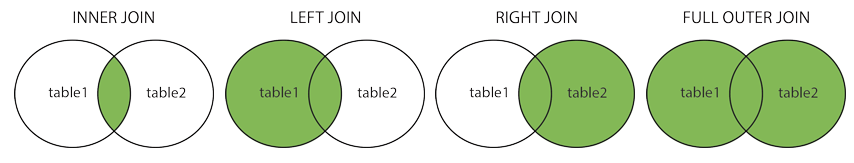

## **SELF JOIN**

A self join is a regular join, but the table is joined with itself.

statement matches customers that are from the same city:

In [298]:
sql = "SELECT A.CUST_NAME AS CustomerName1, B.CUST_NAME AS CustomerName2, A.WORKING_AREA, A.GRADE, A.OPENING_AMT \
       FROM customer A, customer B \
       WHERE A.CUST_CODE <> B.CUST_CODE \
       AND A.WORKING_AREA = B.WORKING_AREA \
       ORDER BY A.WORKING_AREA;"

In [299]:
pd.read_sql(sql,
            connection)

,CustomerName1,CustomerName2,WORKING_AREA,GRADE,OPENING_AMT
0,Ravindran,Rangarappa,Bangalore,2,5000
1,Ravindran,Venkatpati,Bangalore,2,5000
2,Ravindran,Srinivas,Bangalore,2,5000
3,Srinivas,Rangarappa,Bangalore,2,8000
4,Srinivas,Venkatpati,Bangalore,2,8000
5,Srinivas,Ravindran,Bangalore,2,8000
6,Rangarappa,Venkatpati,Bangalore,2,8000
7,Rangarappa,Srinivas,Bangalore,2,8000
8,Rangarappa,Ravindran,Bangalore,2,8000
9,Venkatpati,Rangarappa,Bangalore,2,8000


## **UNION**

The UNION operator is used to combine the result-set of two or more SELECT statements.

Every SELECT statement within UNION must have the same number of columns
The columns must also have similar data types
The columns in every SELECT statement must also be in the same order

returns the cities (only distinct values) from both the "customer" and the "AGENTS" table:

In [300]:
sql = "SELECT WORKING_AREA FROM customer \
       UNION \
       SELECT WORKING_AREA FROM AGENTS \
       ORDER BY WORKING_AREA;"

In [301]:
pd.read_sql(sql,
            connection)

,WORKING_AREA
0,Bangalore
1,Brisban
2,Chennai
3,Hampshair
4,Izmir
5,London
6,Mexico
7,Mumbai
8,New York
9,San Jose


statement returns the cities (duplicate values also) from both the "customer" and the "AGENTS" table:

In [302]:
sql = "SELECT WORKING_AREA FROM customer \
       UNION ALL \
       SELECT WORKING_AREA FROM AGENTS \
       ORDER BY WORKING_AREA;"

In [303]:
pd.read_sql(sql,
            connection)

,WORKING_AREA
0,Bangalore
1,Bangalore
2,Bangalore
3,Bangalore
4,Bangalore
5,Bangalore
6,Brisban
7,Brisban
8,Brisban
9,Brisban


statement returns the New York (only distinct values) from both the "customer" and the "AGENTS" table:

In [304]:
sql = "SELECT CUST_NAME, WORKING_AREA FROM customer \
       WHERE WORKING_AREA='New York' \
       UNION \
       SELECT AGENT_NAME, WORKING_AREA FROM AGENTS \
       WHERE WORKING_AREA='New York' \
       ORDER BY WORKING_AREA;"

In [305]:
pd.read_sql(sql,
            connection)

,CUST_NAME,WORKING_AREA
0,Albert,New York
1,Alford,New York
2,Bolt,New York
3,Micheal,New York


statement returns the New York (duplicated values also) from both the "customer" and the "AGENTS" table:

In [306]:
sql = "SELECT CUST_NAME, WORKING_AREA FROM customer \
       WHERE WORKING_AREA='New York' \
       UNION ALL \
       SELECT AGENT_NAME, WORKING_AREA FROM AGENTS \
       WHERE WORKING_AREA='New York' \
       ORDER BY WORKING_AREA;"

In [307]:
pd.read_sql(sql,
            connection)

,CUST_NAME,WORKING_AREA
0,Micheal,New York
1,Albert,New York
2,Bolt,New York
3,Alford,New York


statement lists all customers and agents:

In [308]:
sql = "SELECT 'Customer' AS Type, WORKING_AREA, AGENT_CODE \
       FROM customer \
       UNION \
       SELECT 'Agents', WORKING_AREA, AGENT_CODE \
       FROM AGENTS;"

In [309]:
pd.read_sql(sql,
            connection)

,Type,WORKING_AREA,AGENT_CODE
0,Agents,Bangalore,A001
1,Agents,Bangalore,A011
2,Agents,Brisban,A005
3,Agents,Chennai,A010
4,Agents,Hampshair,A009
5,Agents,Mexico,A003
6,Agents,Mexico,A006
7,Agents,Mexico,NEW11
8,Agents,Mumbai,A002
9,Agents,New York,A008


## **GROUP BY**

The GROUP BY statement groups rows that have the same values into summary rows, like "find the number of customers in each country".

The GROUP BY statement is often used with aggregate functions (COUNT(), MAX(), MIN(), SUM(), AVG()) to group the result-set by one or more columns.

statement lists the number of customers in each city:

In [310]:
sql = "SELECT COUNT(CUST_CODE), WORKING_AREA \
       FROM customer \
       GROUP BY WORKING_AREA;"

In [311]:
pd.read_sql(sql,
            connection)

,COUNT(CUST_CODE),WORKING_AREA
0,4,Bangalore
1,3,Brisban
2,3,Chennai
3,1,Hampshair
4,1,Izmir
5,4,London
6,3,Mumbai
7,3,New York
8,1,San Jose
9,3,Torento


statement lists the number of customers in each city, sorted high to low:

In [312]:
sql = "SELECT COUNT(CUST_CODE), WORKING_AREA \
       FROM customer \
       GROUP BY WORKING_AREA \
       ORDER BY COUNT(CUST_CODE) DESC;"

In [313]:
pd.read_sql(sql,
            connection)

,COUNT(CUST_CODE),WORKING_AREA
0,4,Bangalore
1,4,London
2,3,Brisban
3,3,Chennai
4,3,Mumbai
5,3,New York
6,3,Torento
7,1,Hampshair
8,1,Izmir
9,1,San Jose


In [314]:
sql = "SELECT AGENTS.AGENT_NAME, COUNT(ORDERS.ORD_NUM) AS NumberOfOrders FROM ORDERS \
       LEFT JOIN AGENTS ON ORDERS.AGENT_CODE = AGENTS.AGENT_CODE \
       GROUP BY AGENT_NAME;"

 statement lists the number of orders sent by each **AGENT:**

In [315]:
pd.read_sql(sql,
            connection)

,AGENT_NAME,NumberOfOrders
0,None,2
1,Alex,2
2,Alford,3
3,Anderson,3
4,Benjamin,1
5,Ivan,4
6,Lucida,2
7,McDen,2
8,Mukesh,7
9,Ravi Kumar,2


## **HAVING**

The HAVING clause was added to SQL because the WHERE keyword cannot be used with aggregate functions.

statement lists the number of customers in each CİTY. Only include cities with more than 2 customers:

In [316]:
sql = "SELECT COUNT(CUST_CODE), WORKING_AREA \
       FROM customer \
       GROUP BY WORKING_AREA \
       HAVING COUNT(CUST_CODE) > 2;"

In [317]:
pd.read_sql(sql,
            connection)

,COUNT(CUST_CODE),WORKING_AREA
0,4,Bangalore
1,3,Brisban
2,3,Chennai
3,4,London
4,3,Mumbai
5,3,New York
6,3,Torento


statement lists the number of customers in each city, sorted high to low (Only include countries with more than 2 customers):

In [318]:
sql =" SELECT COUNT(CUST_CODE), WORKING_AREA \
       FROM customer \
       GROUP BY WORKING_AREA \
       HAVING COUNT(CUST_CODE) > 2 \
       ORDER BY COUNT(CUST_CODE) DESC;"

In [319]:
pd.read_sql(sql,
            connection)

,COUNT(CUST_CODE),WORKING_AREA
0,4,Bangalore
1,4,London
2,3,Brisban
3,3,Chennai
4,3,Mumbai
5,3,New York
6,3,Torento


statement lists the employees that have registered more than 2 orders:

In [320]:
sql = "SELECT AGENTS.AGENT_NAME, COUNT(ORDERS.ORD_NUM) AS NumberOfOrders \
       FROM (ORDERS \
       INNER JOIN AGENTS ON ORDERS.AGENT_CODE = AGENTS.AGENT_CODE) \
       GROUP BY AGENT_NAME \
       HAVING COUNT(ORDERS.ORD_NUM) > 2;"

In [321]:
pd.read_sql(sql,
            connection)

,AGENT_NAME,NumberOfOrders
0,Alford,3
1,Anderson,3
2,Ivan,4
3,Mukesh,7
4,Santakumar,5


statement lists if the agents starting with "a" have registered more than 2 orders:

In [322]:
sql = "SELECT AGENTS.AGENT_NAME, COUNT(ORDERS.ORD_NUM) AS NumberOfOrders \
       FROM (ORDERS \
       INNER JOIN AGENTS ON ORDERS.AGENT_CODE = AGENTS.AGENT_CODE) \
       WHERE AGENT_NAME LIKE 'a%' \
       GROUP BY AGENT_NAME \
       HAVING COUNT(ORDERS.ORD_NUM) > 2;"

In [323]:
pd.read_sql(sql,
            connection)

,AGENT_NAME,NumberOfOrders
0,Alford,3
1,Anderson,3


## **EXİSTS**

The EXISTS operator is used to test for the existence of any record in a subquery.

The EXISTS operator returns TRUE if the subquery returns one or more records.

statement returns TRUE and lists the agents with a orders price more than 1000:

In [324]:
sql = "SELECT AGENT_NAME \
       FROM AGENTS \
       WHERE EXISTS (SELECT ORD_AMOUNT FROM ORDERS WHERE ORDERS.AGENT_CODE = AGENTS.AGENT_CODE AND ORD_AMOUNT > 1000);"

In [325]:
pd.read_sql(sql,
            connection)

,AGENT_NAME
0,Alex
1,Alford
2,Ravi Kumar
3,Santakumar
4,Lucida
5,Anderson
6,Mukesh
7,McDen
8,Ivan


## **CASE**

The CASE statement goes through conditions and returns a value when the first condition is met (like an if-then-else statement). So, once a condition is true, it will stop reading and return the result. If no conditions are true, it returns the value in the ELSE clause.

If there is no ELSE part and no conditions are true, it returns NULL.

In [326]:
sql = "SELECT CUST_CODE, GRADE, \
       CASE \
           WHEN GRADE > 2 THEN 'The grade is greater than 2' \
           WHEN GRADE = 1 THEN 'The grade is 1' \
           ELSE 'The grade is under 1' \
       END AS GradeText \
       FROM customer;"

In [327]:
pd.read_sql(sql,
            connection)

,CUST_CODE,GRADE,GradeText
0,C00013,2,The grade is under 1
1,C00001,2,The grade is under 1
2,C00020,3,The grade is greater than 2
3,C00025,2,The grade is under 1
4,C00024,2,The grade is under 1
5,C00015,1,The grade is 1
6,C00002,3,The grade is greater than 2
7,C00018,2,The grade is under 1
8,C00021,1,The grade is 1
9,C00019,1,The grade is 1


## **IFNULL()**

ISNULL() function lets you return an alternative value when an expression is NULL:

In [328]:
sql = "SELECT ORD_NUM , ORD_AMOUNT - IFNULL(ADVANCE_AMOUNT, 0) \
       FROM ORDERS;"

In [329]:
pd.read_sql(sql,
            connection)

,ORD_NUM,"ORD_AMOUNT - IFNULL(ADVANCE_AMOUNT, 0)"
0,200100,400
1,200110,2500
2,200107,3600
3,200112,1600
4,200113,3400
5,200102,1700
6,200114,1500
7,200122,2100
8,200118,400
9,200119,3300


## **Stored Procedures**

A stored procedure is a prepared SQL code that you can save, so the code can be reused over and over again.

So if you have an SQL query that you write over and over again, save it as a stored procedure, and then just call it to execute it.

You can also pass parameters to a stored procedure, so that the stored procedure can act based on the parameter value(s) that is passed.

In [330]:
def _customFun(cust_name, payment_amt):
    result = 'Name : ' + str(cust_name) + ' Payment : ' + str(payment_amt)
    return result

In [331]:
connection.create_function("GET_PAYMENT", 2, _customFun)

In [332]:
sql = "SELECT GET_PAYMENT(CUST_NAME,PAYMENT_AMT)  \
       FROM customer;"

In [333]:
pd.read_sql(sql,
            connection)

,"GET_PAYMENT(CUST_NAME,PAYMENT_AMT)"
0,Name : Holmes Payment : 7000
1,Name : Micheal Payment : 2000
2,Name : Albert Payment : 6000
3,Name : Ravindran Payment : 4000
4,Name : Cook Payment : 7000
5,Name : Stuart Payment : 3000
6,Name : Bolt Payment : 9000
7,Name : Fleming Payment : 9000
8,Name : Jacks Payment : 7000
9,Name : Yearannaidu Payment : 7000
